<a href="https://colab.research.google.com/github/prof-sd1/Data-Science/blob/main/Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5: Exploratory Data Analysis (EDA)


**Exploratory Data Analysis (EDA)** is a crucial phase in any data science or analytics project. It involves analyzing datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. The primary goal of EDA is to gain a deeper understanding of the data, uncover patterns, identify anomalies, test hypotheses, and ensure the data is clean and ready for further analysis or model building.

## 5.1 Descriptive Statistics
Descriptive statistics are the foundational elements of understanding your data, providing crucial initial insights that guide further exploratory analysis and subsequent modeling steps.

Descriptive Statistics focuses specifically on the quantitative methods used to summarize and describe the main features of a dataset. Unlike inferential statistics, which aims to make predictions or draw conclusions about a larger population, descriptive statistics is solely concerned with the characteristics of the *observed data*.

The main components Descriptive Statistics:

### I. Measures of Central Tendency

These statistics describe the "center" or "typical" value of a dataset.

1.  **Mean (Average):**
    * **Definition:** The sum of all values divided by the number of values.
    * **Formula:** \begin{equation}\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}\end{equation}
    * **Use Case:** Best for symmetrically distributed data without extreme outliers.
    * **Sensitivity:** Highly sensitive to outliers.
2.  **Median:**
    * **Definition:** The middle value in an ordered dataset. If there's an even number of observations, it's the average of the two middle values.
    * **Formula:**
    
    Odd: \begin{equation}( x_{(\frac{n+1}{2})} )\end{equation} Even: \begin{equation}( \frac{x_{(\frac{n}{2})} + x_{(\frac{n}{2} + 1)}}{2} )\end{equation}
    * **Use Case:** Preferred for skewed distributions or data with outliers, as it is robust to extreme values.
3.  **Mode:**
    * **Definition:** The value that appears most frequently in a dataset. A dataset can have one mode (unimodal), multiple modes (multimodal), or no mode.
    * **Use Case:** Primarily used for categorical or discrete numerical data. It's the only measure of central tendency applicable to nominal data.



In [1]:
#EXAMPLES OF MEASURES OF CENTERAL TENDENCY

import numpy as np
import pandas as pd

# Create a sample dataset
data = [1, 2, 2, 3, 4, 5, 5, 5, 6, 7]
df = pd.DataFrame(data, columns=['values'])

# Calculate Mean
mean_value = np.mean(data)
print(f"Mean (Numpy): {mean_value}")
mean_value_df = df['values'].mean()
print(f"Mean (Pandas): {mean_value_df}")

# Calculate Median
median_value = np.median(data)
print(f"\nMedian (Numpy): {median_value}")
median_value_df = df['values'].median()
print(f"Median (Pandas): {median_value_df}")

# Calculate Mode
# Using scipy for mode as numpy.mode is deprecated and pandas mode can return multiple modes
from scipy import stats
mode_value = stats.mode(data)
print(f"\nMode (Scipy): {mode_value.mode}")
mode_value_df = df['values'].mode()
print(f"Mode (Pandas): {mode_value_df.tolist()}") # Pandas mode returns a Series

Mean (Numpy): 4.0
Mean (Pandas): 4.0

Median (Numpy): 4.5
Median (Pandas): 4.5

Mode (Scipy): 5
Mode (Pandas): [5]


### II. Measures of Variability (Spread/Dispersion)

These statistics describe how spread out or dispersed the data points are from the center.

1.  **Range:**
    * **Definition:** The difference between the maximum and minimum values in a dataset.
    * **Formula:** Range = Maximum Value - Minimum Value
    * **Use Case:** Simple to calculate, but highly sensitive to outliers and only provides a limited view of data spread.
2.  **Variance:**
    * **Definition:** The average of the squared differences from the mean. It measures how far each number in the dataset is from the mean.
    * **Formula (Population):** $\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}$
    * **Formula (Sample):** $s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$ (using $n-1$ for sample variance provides an unbiased estimate of the population variance)
    * **Units:** The units of variance are the square of the original data's units, which can make interpretation difficult.
3.  **Standard Deviation:**
    * **Definition:** The square root of the variance. It is the most commonly used measure of spread, as it is in the same units as the original data.
    * **Formula (Population):**\begin{equation} \sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}\end{equation}
    * **Formula (Sample):** $s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$
    * **Use Case:** Provides a clear understanding of the typical deviation of data points from the mean. A higher standard deviation indicates greater variability.
4.  **Interquartile Range (IQR):**
    * **Definition:** The difference between the third quartile (Q3) and the first quartile (Q1). Q1 is the 25th percentile, and Q3 is the 75th percentile.
    * **Formula:** $IQR = Q3 - Q1$
    * **Use Case:** Robust to outliers, as it focuses on the middle 50% of the data. Useful for skewed distributions.



In [2]:
#EXAMPLES OF MEASURES OF VARIABILITY

# Calculate Range
range_value = np.max(data) - np.min(data)
print(f"Range (Numpy): {range_value}")
range_value_df = df['values'].max() - df['values'].min()
print(f"Range (Pandas): {range_value_df}")

# Calculate Variance
# By default, numpy.var calculates population variance (ddof=0)
variance_value_pop = np.var(data)
print(f"\nPopulation Variance (Numpy): {variance_value_pop}")
# To calculate sample variance in numpy, set ddof=1
variance_value_sample_np = np.var(data, ddof=1)
print(f"Sample Variance (Numpy): {variance_value_sample_np}")
# By default, pandas.var calculates sample variance (ddof=1)
variance_value_sample_df = df['values'].var()
print(f"Sample Variance (Pandas): {variance_value_sample_df}")
# To calculate population variance in pandas, set ddof=0
variance_value_pop_df = df['values'].var(ddof=0)
print(f"Population Variance (Pandas): {variance_value_pop_df}")


# Calculate Standard Deviation
# By default, numpy.std calculates population standard deviation (ddof=0)
std_dev_value_pop = np.std(data)
print(f"\nPopulation Standard Deviation (Numpy): {std_dev_value_pop}")
# To calculate sample standard deviation in numpy, set ddof=1
std_dev_value_sample_np = np.std(data, ddof=1)
print(f"Sample Standard Deviation (Numpy): {std_dev_value_sample_np}")
# By default, pandas.std calculates sample standard deviation (ddof=1)
std_dev_value_sample_df = df['values'].std()
print(f"Sample Standard Deviation (Pandas): {std_dev_value_sample_df}")
# To calculate population standard deviation in pandas, set ddof=0
std_dev_value_pop_df = df['values'].std(ddof=0)
print(f"Population Standard Deviation (Pandas): {std_dev_value_pop_df}")


# Calculate Interquartile Range (IQR)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
iqr_value_np = Q3 - Q1
print(f"\nIQR (Numpy): {iqr_value_np}")

iqr_value_df = df['values'].quantile(0.75) - df['values'].quantile(0.25)
print(f"IQR (Pandas): {iqr_value_df}")

Range (Numpy): 6
Range (Pandas): 6

Population Variance (Numpy): 3.4
Sample Variance (Numpy): 3.7777777777777777
Sample Variance (Pandas): 3.7777777777777777
Population Variance (Pandas): 3.4

Population Standard Deviation (Numpy): 1.8439088914585775
Sample Standard Deviation (Numpy): 1.9436506316151
Sample Standard Deviation (Pandas): 1.9436506316151
Population Standard Deviation (Pandas): 1.8439088914585775

IQR (Numpy): 2.75
IQR (Pandas): 2.75


### III. Measures of Distribution Shape

These statistics describe the shape of the data's distribution.

1.  **Skewness:**
    * **Definition:** Measures the asymmetry of the probability distribution of a real-valued random variable about its mean.
    * **Types:**
        * **Positive Skew (Right-skewed):** Tail is longer on the right side; mean > median > mode.
        * **Negative Skew (Left-skewed):** Tail is longer on the left side; mean < median < mode.
        * **Zero Skew:** Symmetrical distribution (e.g., normal distribution); mean $\approx$ median $\approx$ mode.
    * **Interpretation:** Indicates whether data points are concentrated more on one side of the mean.
2.  **Kurtosis:**
    * **Definition:** Measures the "tailedness" of the probability distribution of a real-valued random variable. It describes the shape of the tails of the distribution.
    * **Types:**
        * **Mesokurtic:** Similar kurtosis to a normal distribution (e.g., a normal distribution has a kurtosis of 3, or an excess kurtosis of 0).
        * **Leptokurtic:** Higher kurtosis (positive excess kurtosis); fatter tails and a sharper peak than a normal distribution, indicating more outliers.
        * **Platykurtic:** Lower kurtosis (negative excess kurtosis); thinner tails and a flatter peak than a normal distribution, indicating fewer outliers.
    * **Interpretation:** Helps understand the presence of outliers and the general shape of the distribution's extremes.





In [4]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Sample Data
data = [12, 15, 12, 15, 16, 16, 17, 18, 18, 19, 25]

# Create a DataFrame
df = pd.DataFrame({'values': data})

# ---------------------------
# Skewness: Measure of asymmetry
# ---------------------------

# SciPy skewness with bias correction (default: bias=False)
skew_scipy = skew(data)  # Same as skew(data, bias=False)
print(f"Skewness (SciPy, bias=False): {skew_scipy:.4f}")

# SciPy skewness without correction (like Pandas)
skew_scipy_biased = skew(data, bias=True)
print(f"Skewness (SciPy, bias=True):  {skew_scipy_biased:.4f}")

# Pandas skewness (no bias correction)
skew_pandas = df['values'].skew()
print(f"Skewness (Pandas):            {skew_pandas:.4f}")

# ---------------------------
# Kurtosis: Measure of tailedness
# ---------------------------

# SciPy kurtosis (Fisher by default)
kurt_fisher_scipy = kurtosis(data)  # kurtosis - 3
print(f"\nKurtosis (SciPy, Fisher):     {kurt_fisher_scipy:.4f}")

# SciPy kurtosis (Pearson)
kurt_pearson_scipy = kurtosis(data, fisher=False)
print(f"Kurtosis (SciPy, Pearson):    {kurt_pearson_scipy:.4f}")

# Pandas kurtosis (Fisher only)
kurt_fisher_pandas = df['values'].kurt()
print(f"Kurtosis (Pandas, Fisher):    {kurt_fisher_pandas:.4f}")

# Convert Pandas Fisher to Pearson
kurt_pearson_pandas = kurt_fisher_pandas + 3
print(f"Kurtosis (Pandas, Pearson):   {kurt_pearson_pandas:.4f}")


Skewness (SciPy, bias=False): 0.8983
Skewness (SciPy, bias=True):  0.8983
Skewness (Pandas):            1.0469

Kurtosis (SciPy, Fisher):     0.9077
Kurtosis (SciPy, Pearson):    3.9077
Kurtosis (Pandas, Fisher):    2.3461
Kurtosis (Pandas, Pearson):   5.3461


### IV. Percentiles and Quartiles

* **Percentiles:** Values that divide a dataset into 100 equal parts. The nth percentile is the value below which n% of the observations fall.
* **Quartiles:** Specific percentiles that divide the data into four equal parts:
    * **Q1 (First Quartile):** 25th percentile.
    * **Q2 (Second Quartile):** 50th percentile, which is also the median.
    * **Q3 (Third Quartile):** 75th percentile.


In [5]:
#EXAMPLES OF PERCENTILES AND QUARTILES

# Calculate Percentiles
# 10th percentile
percentile_10 = np.percentile(data, 10)
print(f"10th Percentile (Numpy): {percentile_10}")

# 90th percentile
percentile_90 = np.percentile(data, 90)
print(f"90th Percentile (Numpy): {percentile_90}")

# Using pandas quantile for percentiles (0 to 1)
percentile_10_df = df['values'].quantile(0.1)
print(f"10th Percentile (Pandas): {percentile_10_df}")

percentile_90_df = df['values'].quantile(0.9)
print(f"90th Percentile (Pandas): {percentile_90_df}")


# Calculate Quartiles
# Q1 (25th percentile)
Q1_np = np.percentile(data, 25)
print(f"\nQ1 (25th Percentile) (Numpy): {Q1_np}")

Q1_df = df['values'].quantile(0.25)
print(f"Q1 (25th Percentile) (Pandas): {Q1_df}")

# Q2 (50th percentile / Median)
Q2_np = np.percentile(data, 50)
print(f"\nQ2 (50th Percentile / Median) (Numpy): {Q2_np}")

Q2_df = df['values'].quantile(0.50)
print(f"Q2 (50th Percentile / Median) (Pandas): {Q2_df}")

# Q3 (75th percentile)
Q3_np = np.percentile(data, 75)
print(f"\nQ3 (75th Percentile) (Numpy): {Q3_np}")

Q3_df = df['values'].quantile(0.75)
print(f"Q3 (75th Percentile) (Pandas): {Q3_df}")

10th Percentile (Numpy): 12.0
90th Percentile (Numpy): 19.0
10th Percentile (Pandas): 12.0
90th Percentile (Pandas): 19.0

Q1 (25th Percentile) (Numpy): 15.0
Q1 (25th Percentile) (Pandas): 15.0

Q2 (50th Percentile / Median) (Numpy): 16.0
Q2 (50th Percentile / Median) (Pandas): 16.0

Q3 (75th Percentile) (Numpy): 18.0
Q3 (75th Percentile) (Pandas): 18.0


### V. Application in EDA

When performing descriptive statistics within EDA, these measures are typically calculated for each relevant variable in the dataset. Common functions in programming languages like Python (Pandas) provide these summaries easily (e.g., `df.describe()`, `df.value_counts()`). The insights gained from these numerical summaries are then often complemented by visualizations (histograms, box plots, bar charts) to provide a holistic understanding of the data's characteristics.


## 5.2 Correlation Matrix & Heatmaps

"Correlation Matrix & Heatmaps," delves into essential tools for understanding the relationships between multiple variables within a dataset. This section is a crucial part of Exploratory Data Analysis (EDA) as it helps to identify patterns, multicollinearity, and potential features for predictive modeling.

### I. Correlation

**Correlation** is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's important to distinguish correlation from causation; correlation indicates a relationship, but not necessarily that one variable causes the other.

**Types of Correlation Coefficients:**

1.  **Pearson Correlation Coefficient ($\\rho$ or $r$):**
      * **Definition:** Measures the strength and direction of a *linear* relationship between two continuous variables.
      * **Range:** Values range from -1 to +1.
          * **+1:** Perfect positive linear relationship (as one variable increases, the other increases proportionally).
          * **-1:** Perfect negative linear relationship (as one variable increases, the other decreases proportionally).
          * **0:** No linear relationship.
      * **Assumptions:** Assumes that variables are normally distributed and the relationship is linear. Sensitive to outliers.
      * **Formula:** $r = \\frac{n(\\sum xy) - (\\sum x)(\\sum y)}{\\sqrt{[n\\sum x^2 - (\\sum x)^2][n\\sum y^2 - (\\sum y)^2]}}$ (for sample)
2.  **Spearman's Rank Correlation Coefficient ($\\rho$ or $r\_s$):**
      * **Definition:** Measures the strength and direction of a *monotonic* relationship between two variables. It assesses how well the relationship between two variables can be described using a monotonic function. This means that as one variable increases, the other variable either tends to increase or decrease, but not necessarily at a constant rate. It works on the *ranks* of the data rather than the raw values.
      * **Range:** Values range from -1 to +1.
      * **Use Case:** Useful for non-normally distributed data, ordinal data, or when the relationship is not strictly linear but consistently increasing or decreasing. Less sensitive to outliers than Pearson.
3.  **Kendall's Tau ($\\tau$):**
      * **Definition:** Another non-parametric measure of the strength of dependence between two variables, also based on ranks. It's often used as an alternative to Spearman's rho.
      * **Use Case:** Particularly useful with smaller sample sizes and when there are many tied ranks.

**Interpreting Correlation Strength (General Guidelines, but context matters):**

  * **0.0 to $\\pm$0.2:** Very weak or no correlation
  * **$\\pm$0.2 to $\\pm$0.4:** Weak correlation
  * **$\\pm$0.4 to $\\pm$0.6:** Moderate correlation
  * **$\\pm$0.6 to $\\pm$0.8:** Strong correlation
  * **$\\pm$0.8 to $\\pm$1.0:** Very strong correlation


In [6]:
# EXAMPLES OF CORRELATION

import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau

# Create a sample DataFrame with numerical data
data = {'Variable A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Variable B': [2, 4, 5, 4, 5, 7, 8, 9, 10, 12],
        'Variable C': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        'Variable D': [5, 5, 6, 7, 7, 8, 8, 9, 9, 10]} # Example with a non-linear but monotonic relationship
df_corr = pd.DataFrame(data)

print("Sample DataFrame:")
display(df_corr)

# Calculate Pearson Correlation Coefficient
pearson_corr = df_corr.corr(method='pearson')
print("\nPearson Correlation Matrix:")
display(pearson_corr)

# Calculate Spearman's Rank Correlation Coefficient
spearman_corr = df_corr.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
display(spearman_corr)

# Calculate Kendall's Tau Correlation Coefficient
kendall_corr = df_corr.corr(method='kendall')
print("\nKendall's Tau Correlation Matrix:")
display(kendall_corr)

# You can also calculate correlation between two specific columns
pearson_ab = df_corr['Variable A'].corr(df_corr['Variable B'], method='pearson')
print(f"\nPearson Correlation between A and B: {pearson_ab:.4f}")

spearman_ad = spearmanr(df_corr['Variable A'], df_corr['Variable D'])
print(f"Spearman Correlation between A and D: {spearman_ad.correlation:.4f}")

kendall_ac = kendalltau(df_corr['Variable A'], df_corr['Variable C'])
print(f"Kendall's Tau Correlation between A and C: {kendall_ac.correlation:.4f}")

Sample DataFrame:


,Variable A,Variable B,Variable C,Variable D
0,1,2,10,5
1,2,4,9,5
2,3,5,8,6
3,4,4,7,7
4,5,5,6,7
5,6,7,5,8
6,7,8,4,8
7,8,9,3,9
8,9,10,2,9
9,10,12,1,10



Pearson Correlation Matrix:


,Variable A,Variable B,Variable C,Variable D
Variable A,1.000000,0.971908,-1.000000,0.985664
Variable B,0.971908,1.000000,-0.971908,0.943923
Variable C,-1.000000,-0.971908,1.000000,-0.985664
Variable D,0.985664,0.943923,-0.985664,1.000000



Spearman Correlation Matrix:


,Variable A,Variable B,Variable C,Variable D
Variable A,1.000000,0.969530,-1.000000,0.987804
Variable B,0.969530,1.000000,-0.969530,0.947549
Variable C,-1.000000,-0.969530,1.000000,-0.987804
Variable D,0.987804,0.947549,-0.987804,1.000000



Kendall's Tau Correlation Matrix:


,Variable A,Variable B,Variable C,Variable D
Variable A,1.000000,0.932059,-1.000000,0.954521
Variable B,0.932059,1.000000,-0.932059,0.881202
Variable C,-1.000000,-0.932059,1.000000,-0.954521
Variable D,0.954521,0.881202,-0.954521,1.000000



Pearson Correlation between A and B: 0.9719
Spearman Correlation between A and D: 0.9878
Kendall's Tau Correlation between A and C: -1.0000


### II. Correlation Matrix

A **correlation matrix** is a table showing the correlation coefficients between many variables in a dataset. Each cell in the matrix represents the correlation between two specific variables.

**Key Characteristics of a Correlation Matrix:**

  * **Symmetry:** The matrix is symmetric, meaning the correlation between Variable A and Variable B is the same as the correlation between Variable B and Variable A. Thus, the upper triangle of the matrix is a mirror image of the lower triangle.
  * **Diagonal:** The diagonal elements are always 1, as a variable is perfectly correlated with itself.
  * **Size:** For a dataset with $N$ variables, the correlation matrix will be an $N \times N$ matrix.

**Purpose in EDA:**

  * **Quick Overview:** Provides a concise summary of all pairwise linear relationships.
  * **Feature Selection:** Helps identify highly correlated features. If two features are highly correlated, one might be redundant for certain modeling tasks (e.g., to reduce multicollinearity in linear regression).
  * **Understanding Relationships:** Uncovers which variables tend to move together.
  * **Anomaly Detection (sometimes):** Extremely low or high correlations where not expected can sometimes point to data issues.


### III. Heatmaps

A **heatmap** is a graphical representation of data where individual values contained in a matrix are represented as colors. In the context of a correlation matrix, a heatmap visually encodes the strength and direction of correlations, making it much easier to interpret than just looking at raw numbers.

**Key Features and Benefits of using Heatmaps for Correlation Matrices:**

1.  **Color Gradient:** A color gradient is used to represent the correlation values.
      * Typically, warm colors (reds, oranges) might represent strong positive correlations.
      * Cool colors (blues, greens) might represent strong negative correlations.
      * A neutral color (white, light gray) often represents correlations close to zero.
2.  **Immediate Visual Insight:** Allows for quick identification of strong positive, strong negative, and weak correlations without having to read every number.
3.  **Pattern Recognition:** Helps in spotting clusters of variables that are highly correlated with each other.
4.  **Clarity for Large Datasets:** For datasets with many variables, a correlation matrix can be overwhelming. A heatmap distills this information into an easily digestible visual.
5.  **Annotations:** Often, the correlation values themselves are annotated on top of the colored cells to provide precise values.

**Steps to Create and Interpret a Correlation Matrix with a Heatmap:**

1.  **Select Numerical Variables:** Correlation is typically applied to numerical variables. If you have categorical variables, you might need to encode them (e.g., one-hot encoding for nominal, label encoding for ordinal) or use specific correlation measures designed for categorical data (e.g., Cramer's V, Chi-square).
2.  **Calculate Correlation Matrix:** Use a statistical library (e.g., `df.corr()` in Pandas in Python) to compute the correlation coefficients (Pearson is the default, but you can specify Spearman or Kendall).
3.  **Generate Heatmap:** Use a visualization library (e.g., Seaborn's `heatmap()` in Python, or `corrplot` in R) to plot the correlation matrix.
4.  **Interpret the Heatmap:**
      * **Look for Bright Colors (Warm/Cool):** These indicate strong relationships.
          * Dark red/orange: Strong positive correlation.
          * Dark blue/green: Strong negative correlation.
      * **Look for Faint/Neutral Colors:** These indicate weak or no linear correlation.
      * **Identify Multicollinearity:** If two or more independent variables in a regression model are highly correlated, it indicates multicollinearity, which can be problematic for model stability and interpretability. Heatmaps quickly reveal such scenarios.
      * **Relationship with Target Variable:** If your target variable is included, you can quickly see which features have the strongest correlation with it, potentially aiding in initial feature selection.


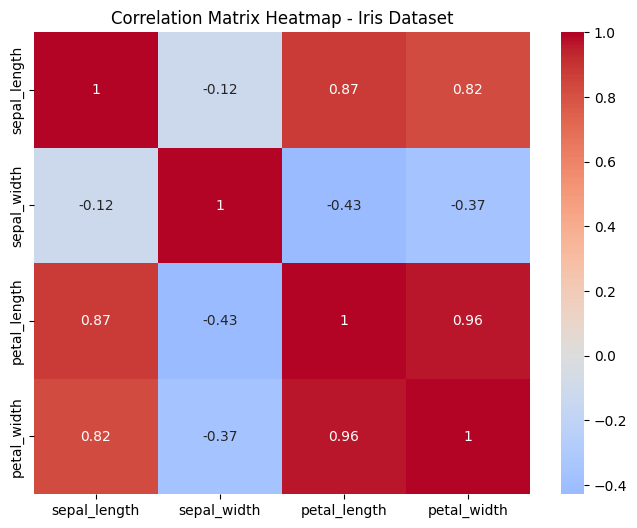

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Iris dataset
df = sns.load_dataset('iris')

# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap - Iris Dataset')
plt.show()


<Figure size 1000x800 with 0 Axes>

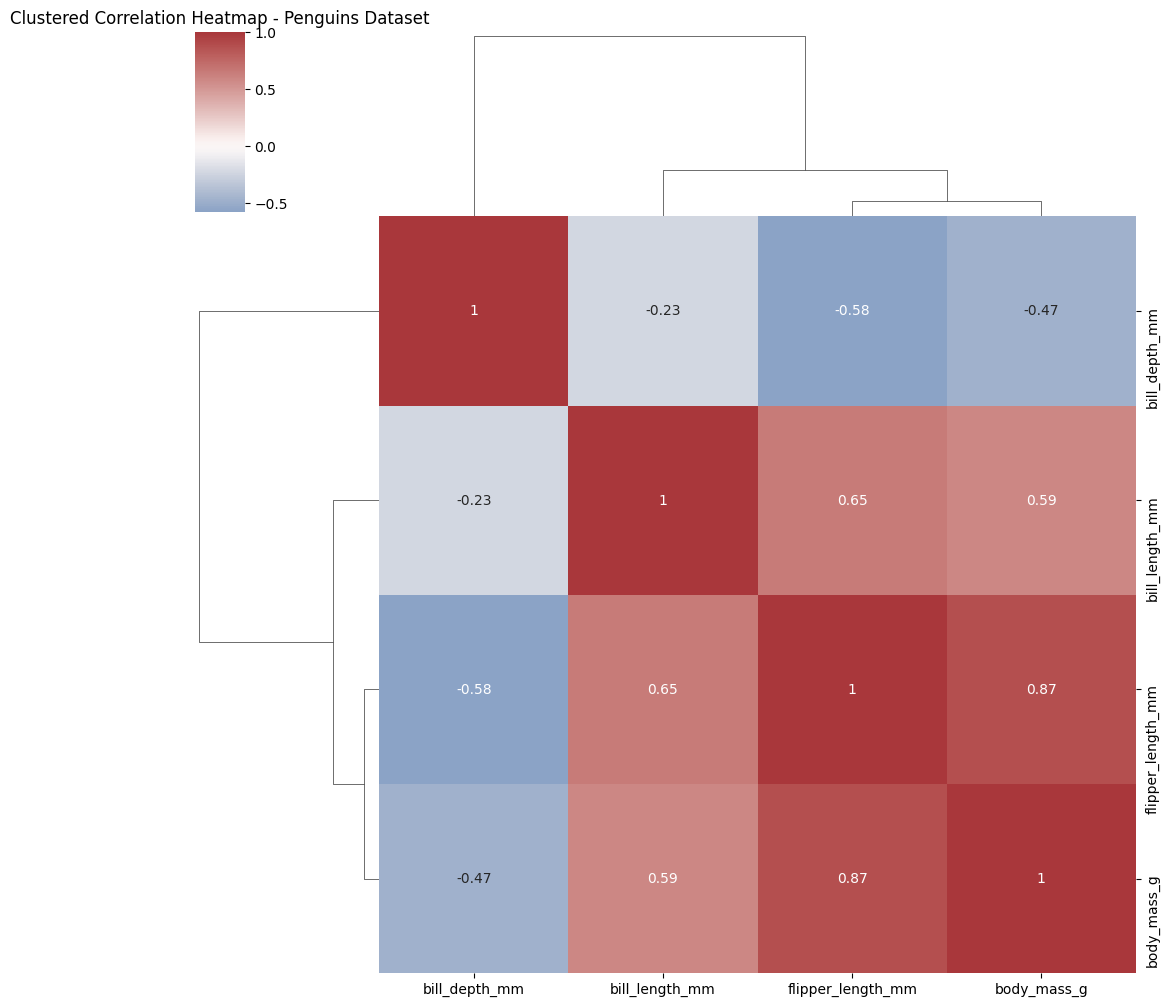

In [9]:
# Load dataset
df = sns.load_dataset('penguins').dropna()

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Cluster the heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(corr, annot=True, cmap='vlag', center=0)
plt.title('Clustered Correlation Heatmap - Penguins Dataset')
plt.show()


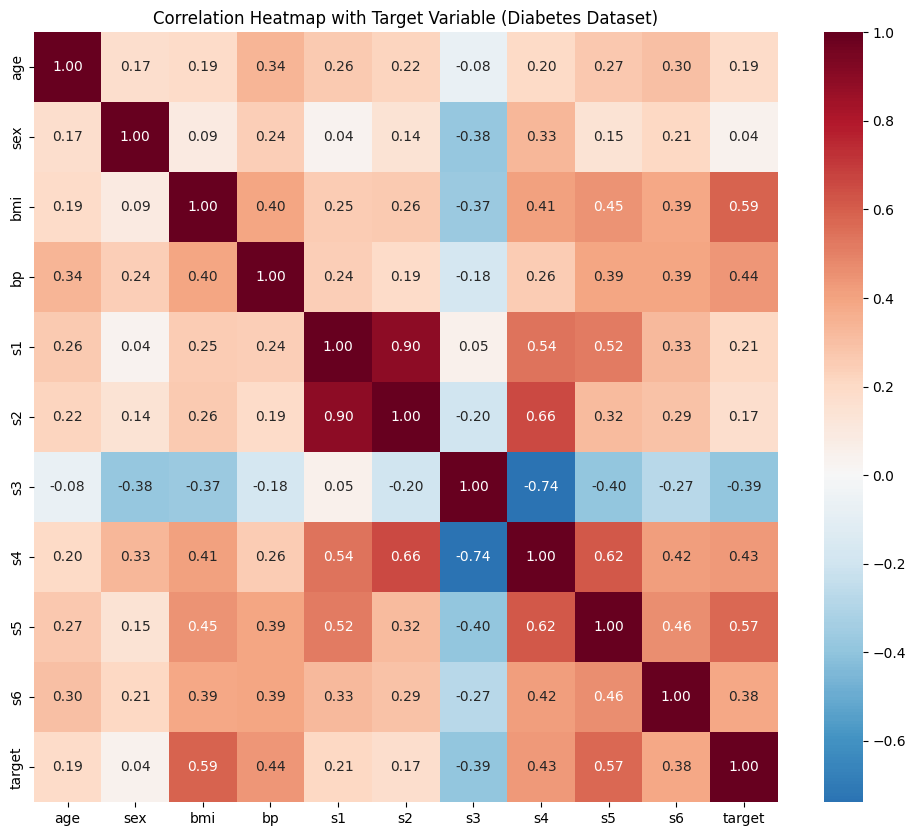

In [10]:
# Sample dataset with a target variable
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)
df = data.frame
df['target'] = data.target

# Compute correlations including target
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap with Target Variable (Diabetes Dataset)')
plt.show()


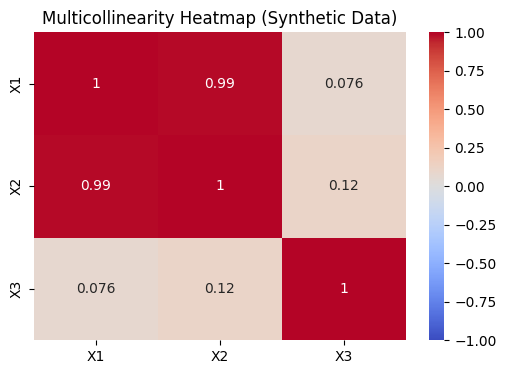

In [11]:
import numpy as np

# Create synthetic data with multicollinearity
np.random.seed(0)
X1 = np.random.rand(100)
X2 = X1 + np.random.normal(0, 0.05, 100)  # highly correlated with X1
X3 = np.random.rand(100)
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Correlation matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Multicollinearity Heatmap (Synthetic Data)')
plt.show()
